<a href="https://colab.research.google.com/github/anantankita/CBVR/blob/main/GLCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np

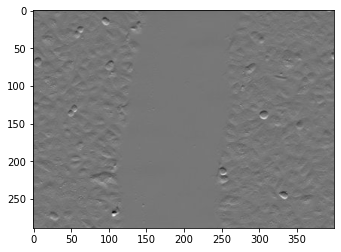

In [ ]:
PATCH_SIZE = 35

image = io.imread('img1.jpg')
plt.imshow(image, cmap='gray')

#Full image
GLCM = greycomatrix(image, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
a= greycoprops(GLCM, 'energy')[0, 0]

# select some patches from grassy areas of the image
cell_locations = [(50, 50), (200, 50), (50, 350), (200, 350)]
cell_patches = []
for loc in cell_locations:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

In [ ]:

# select some patches from sky areas of the image
scratch_locations = [(50, 200), (150, 200), (250, 150), (200, 200)]
scratch_patches = []
for loc in scratch_locations:
    scratch_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# compute some GLCM properties each patch
diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
for patch in (cell_patches + scratch_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(greycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(greycoprops(glcm, 'correlation')[0, 0])
    homogen.append(greycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(greycoprops(glcm, 'energy')[0, 0])
    contrast.append(greycoprops(glcm, 'contrast')[0, 0])